In [2]:
from datasets import load_dataset
from haystack import Document
from haystack import Pipeline
from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.components.embedders import SentenceTransformersDocumentEmbedder
from haystack.components.writers import DocumentWriter


dataset = load_dataset("bilgeyucel/seven-wonders", split="train")

documents = [Document(content=doc["content"], meta=doc["meta"]) for doc in dataset]

c:\Users\EhranLenaerts\anaconda3\envs\rag_b_robots\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
df = pd.DataFrame(dataset)

In [20]:
documents = [Document(content=df["content"][index], meta=df["meta"][index]) for index in df.index]

In [21]:
len(documents)

151

In [19]:
df

,id,content,content_type,meta,id_hash_keys,score,embedding
0,b3de1a673c1eb2876585405395a10c3d,The Colossus of Rhodes (Ancient Greek: ὁ Κολοσ...,text,{'url': 'https://en.wikipedia.org/wiki/Colossu...,[content],None,None
1,5dcd01886fcb24322578ceb49c96cc3e,"[6]\nIn 653, an Arab force under Muslim genera...",text,{'url': 'https://en.wikipedia.org/wiki/Colossu...,[content],None,None
2,3a9492e8764035b8d9d78c3c03a9f029,Construction[edit]\nTimeline and map of the Se...,text,{'url': 'https://en.wikipedia.org/wiki/Colossu...,[content],None,None
3,db3c858d5727a1cfb8dc21ef5240e15f,Philo of Byzantium wrote in De septem mundi mi...,text,{'url': 'https://en.wikipedia.org/wiki/Colossu...,[content],None,None
4,3cb7e329c67351c102ad7c57dc36164e,The lower plates were 25 millimetres (1 in) in...,text,{'url': 'https://en.wikipedia.org/wiki/Colossu...,[content],None,None
...,...,...,...,...,...,...,...
146,11ec8351f936aad17f842d3a94dc5a21,[24]\n\nIdentification with Sennacherib's gard...,text,{'url': 'https://en.wikipedia.org/wiki/Hanging...,[content],None,None
147,d56ae37f6dad42b8da9076308ba85fb6,Only Josephus names Nebuchadnezzar as the king...,text,{'url': 'https://en.wikipedia.org/wiki/Hanging...,[content],None,None
148,3c5c652263fa5433aec2082417b89f57,[36] There was a tradition of Assyrian royal g...,text,{'url': 'https://en.wikipedia.org/wiki/Hanging...,[content],None,None
149,b714102aa7ac3a9622d0d00caa55fa,Sennacherib was proud of the technologies he h...,text,{'url': 'https://en.wikipedia.org/wiki/Hanging...,[content],None,None


In [4]:
documents[0].content

'The Colossus of Rhodes (Ancient Greek: ὁ Κολοσσὸς Ῥόδιος, romanized:\xa0ho Kolossòs Rhódios Greek: Κολοσσός της Ρόδου, romanized:\xa0Kolossós tes Rhódou)[a] was a statue of the Greek sun-god Helios, erected in the city of Rhodes, on the Greek island of the same name, by Chares of Lindos in 280\xa0BC. One of the Seven Wonders of the Ancient World, it was constructed to celebrate the successful defence of Rhodes city against an attack by Demetrius Poliorcetes, who had besieged it for a year with a large army and navy.\nAccording to most contemporary descriptions, the Colossus stood approximately 70 cubits, or 33 metres (108 feet) high – approximately the height of the modern Statue of Liberty from feet to crown – making it the tallest statue in the ancient world.[2] It collapsed during the earthquake of 226 BC, although parts of it were preserved. In accordance with a certain oracle, the Rhodians did not build it again.[3] John Malalas wrote that Hadrian in his reign re-erected the Colo

In [5]:
model = "sentence-transformers/multi-qa-mpnet-base-dot-v1"

document_store = InMemoryDocumentStore()

indexing_pipeline = Pipeline()

indexing_pipeline.add_component(instance=SentenceTransformersDocumentEmbedder(model=model), name="embedder")
indexing_pipeline.add_component(instance=DocumentWriter(document_store=document_store), name="writer")
indexing_pipeline.connect("embedder.documents", "writer.documents")

indexing_pipeline.run({"documents": documents})

c:\Users\EhranLenaerts\anaconda3\envs\rag_b_robots\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\EhranLenaerts\.cache\huggingface\hub\models--sentence-transformers--multi-qa-mpnet-base-dot-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Batches: 100%|██████████| 5/5 [00:37<00:00,  7.47s/it]


{'writer': {'documents_written': 151}}

c:\Users\EhranLenaerts\anaconda3\envs\rag_b_robots\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\EhranLenaerts\.cache\huggingface\hub\models--deepset--roberta-base-squad2-distilled. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


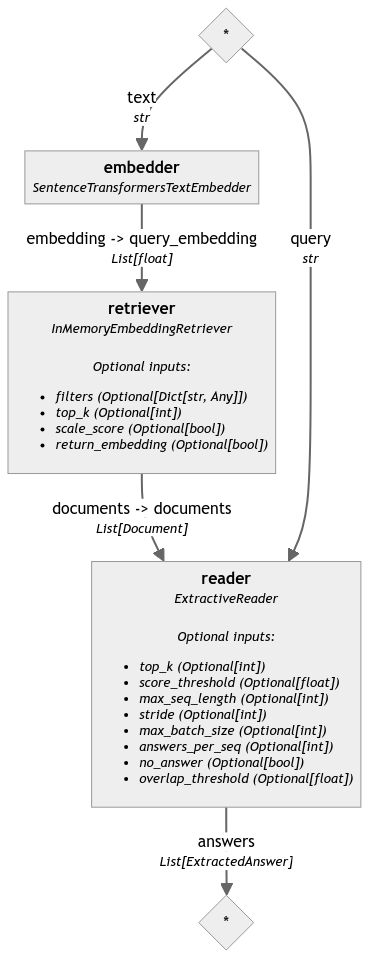

In [6]:
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever
from haystack.components.readers import ExtractiveReader
from haystack.components.embedders import SentenceTransformersTextEmbedder


retriever = InMemoryEmbeddingRetriever(document_store=document_store)
reader = ExtractiveReader()
reader.warm_up()

extractive_qa_pipeline = Pipeline()

extractive_qa_pipeline.add_component(instance=SentenceTransformersTextEmbedder(model=model), name="embedder")
extractive_qa_pipeline.add_component(instance=retriever, name="retriever")
extractive_qa_pipeline.add_component(instance=reader, name="reader")

extractive_qa_pipeline.connect("embedder.embedding", "retriever.query_embedding")
extractive_qa_pipeline.connect("retriever.documents", "reader.documents")

In [11]:
query = "What is the Collosus of Rhodes?"
results = extractive_qa_pipeline.run(
    data={"embedder": {"text": query}, "retriever": {"top_k": 3}, "reader": {"query": query, "top_k": 2}}
)

Batches: 100%|██████████| 1/1 [00:00<00:00, 20.41it/s]


In [12]:
results["reader"]["answers"]

[ExtractedAnswer(query='What is the Collosus of Rhodes?', score=0.6594589352607727, data='a statue of the Greek sun-god Helios', document=Document(id=75fd8474f2c88337f7e0dad69eba0f24ba293cb06693fb746ec403df01a1c0c5, content: 'The Colossus of Rhodes (Ancient Greek: ὁ Κολοσσὸς Ῥόδιος, romanized: ho Kolossòs Rhódios Greek: Κολο...', meta: {'url': 'https://en.wikipedia.org/wiki/Colossus_of_Rhodes', '_split_id': 0}, score: 23.675957357961202), context=None, document_offset=ExtractedAnswer.Span(start=155, end=191), context_offset=None, meta={}),
 ExtractedAnswer(query='What is the Collosus of Rhodes?', score=0.48817551136016846, data='ancient pagan statue', document=Document(id=a3ee3a9a55b47ff651ae11dc56d84d2b6f8d931b795bd866c14eacfa56000965, content: 'Within it, too, are to be seen large masses of rock, by the weight of which the artist steadied it w...', meta: {'url': 'https://en.wikipedia.org/wiki/Colossus_of_Rhodes', '_split_id': 9}, score: 23.987292643768242), context=None, document_off

Batches: 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]


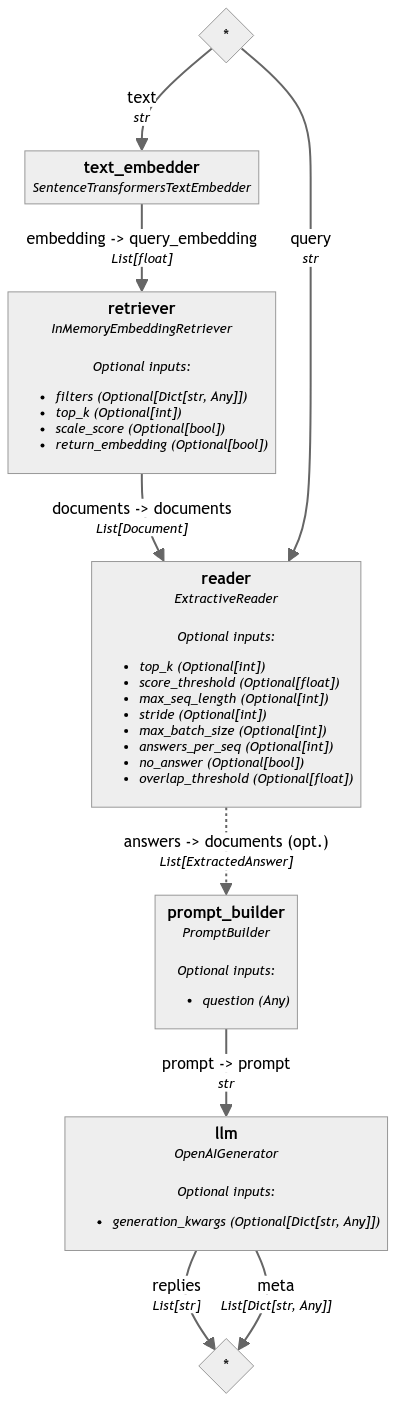

In [5]:
import os
from getpass import getpass
from datasets import load_dataset
from haystack.components.generators import OpenAIGenerator
from haystack import Document
from haystack import Pipeline
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever
from haystack.components.readers import ExtractiveReader
from haystack.components.embedders import SentenceTransformersTextEmbedder
from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.components.embedders import SentenceTransformersDocumentEmbedder
from haystack.components.writers import DocumentWriter

from haystack.components.builders import PromptBuilder

document_store = InMemoryDocumentStore()
dataset = load_dataset("bilgeyucel/seven-wonders", split="train")
docs = [Document(content=doc["content"], meta=doc["meta"]) for doc in dataset]
os.environ["OPENAI_API_KEY"] = getpass("Enter OpenAI API key: ")
generator = OpenAIGenerator(model="gpt-3.5-turbo", organization="xxxdoc_embedder = SentenceTransformersDocumentEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")
doc_embedder.warm_up()

docs_with_embeddings = doc_embedder.run(docs)
document_store.write_documents(docs_with_embeddings["documents"])
text_embedder = SentenceTransformersTextEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")
retriever = InMemoryEmbeddingRetriever(document_store)
reader = ExtractiveReader()
reader.warm_up()

template = """
Using only the following information, answer the question. 
Give the part from the context where you got the information on a separate line.

Context:
{% for document in documents %}
    {{ document.content }}
{% endfor %}

Question: {{question}}
Answer:
"""
prompt_builder = PromptBuilder(template=template)

generator = OpenAIGenerator(model="gpt-3.5-turbo")
basic_rag_pipeline = Pipeline()
# Add components to your pipeline
basic_rag_pipeline.add_component("text_embedder", text_embedder)
basic_rag_pipeline.add_component("retriever", retriever)
basic_rag_pipeline.add_component("prompt_builder", prompt_builder)
basic_rag_pipeline.add_component("llm", generator)

# Now, connect the components to each other
basic_rag_pipeline.connect("text_embedder.embedding", "retriever.query_embedding")
basic_rag_pipeline.connect("retriever", "reader.documents")
basic_rag_pipeline.connect("reader.answers", "prompt_builder.documents")
basic_rag_pipeline.connect("prompt_builder", "llm")

In [9]:
question = "What is the Collosus of Rhodes?"

response = basic_rag_pipeline.run(
    data={"text_embedder": {"text": question},"reader": {"query": question, "top_k": 2}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 60.56it/s]


The Colossus of Rhodes was a giant statue of the Greek sun god Helios, built on the island of Rhodes in the 3rd century BC. 

Part from context: "Colossus of Rhodes was a giant statue of the Greek sun god Helios, built on the island of Rhodes in the 3rd century BC."


In [10]:
response

{'llm': {'replies': ['The Colossus of Rhodes was a giant statue of the Greek sun god Helios, built on the island of Rhodes in the 3rd century BC. \n\nPart from context: "Colossus of Rhodes was a giant statue of the Greek sun god Helios, built on the island of Rhodes in the 3rd century BC."'],
  'meta': [{'model': 'gpt-3.5-turbo-0125',
    'index': 0,
    'finish_reason': 'stop',
    'usage': {'completion_tokens': 69,
     'prompt_tokens': 53,
     'total_tokens': 122}}]}}